# Import the necessary library

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Import the data to the Notebook

In [5]:
data = pd.read_csv('Pima.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
Input=data.drop('Outcome',axis='columns')
Input.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
Output=data.Outcome
Output.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Creating Classification Model

In [32]:
clf=SVC()
clf.fit(Input,Output)

SVC()

In [51]:
clf_scores=cross_val_score(SVC(),Input,Output,cv=10)
clf_scores.mean()

0.7578605604921396

In [71]:
clf.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1], dtype=int64)

# Creating the emsemble Learing Model

In [72]:
ens= BaggingClassifier(base_estimator=clf,n_estimators=20)
ens.fit(Input,Output)

BaggingClassifier(base_estimator=SVC(), n_estimators=20)

In [59]:
ens_scores=cross_val_score(SVC(),Input,Output,cv=10)
ens_scores.mean()

0.7578605604921396

In [73]:
ens.predict([[6,148,72,35,0,33.6,0.627,50]])

array([1], dtype=int64)

# Comparing the Classification and Bagging Classifier

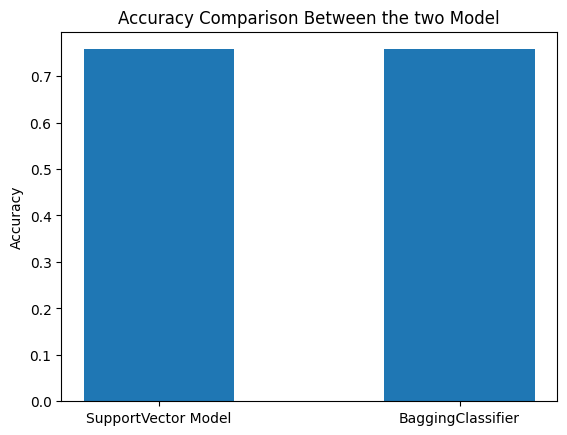

In [94]:
plt.bar(['SupportVector Model', 'BaggingClassifier'], [clf_scores.mean(), ens_scores.mean()],width=0.5)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison Between the two Model");

In [82]:
clf_report = classification_report(Output, clf.predict(Input))
print(clf_report)
print("Support Vector Classifier Score:",clf_scores.mean())

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       500
           1       0.76      0.50      0.60       268

    accuracy                           0.77       768
   macro avg       0.76      0.71      0.72       768
weighted avg       0.77      0.77      0.75       768

Support Vector Classifier Score: 0.7578605604921396


In [84]:
ens_report = classification_report(Output, ens.predict(Input))
print(ens_report)
print("Bagging Classifier Score:",ens_scores.mean())

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       500
           1       0.75      0.51      0.61       268

    accuracy                           0.77       768
   macro avg       0.76      0.71      0.72       768
weighted avg       0.77      0.77      0.76       768

Bagging Classifier Score: 0.7578605604921396
